In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Null and Alternative Hypotheses  
$H_0:$ She cannot predict w/ any consistency  
$H_1:$ She can predict with consistency  

Step 2: Test Statistic  
$X$: Number of times she correctly picked tea first  
Keep in mind that this is Hypergeometric -- Binomial but without replacement  
Also keep in mind that $X_{obs} = 3$

Step 3: Find p-value  
$$ X~Hypergeom(M=8, n=4, N=4),$$ 
where:  
M=number of trials,  
n = number of correct options,  
N = number she got correct

In [5]:
M,n,N = 8, 4, 4
trials = stats.hypergeom.rvs(M, n, N, size = 100)
print(trials) # we are looking at P(X>=3)

# We want P(X>=3)
p_value = 1 - stats.hypergeom.cdf(2, M, n, N)
print("P-value = ", p_value)

[2 1 2 1 2 3 3 2 1 3 2 2 1 3 2 2 2 1 4 2 1 3 2 3 2 2 2 2 1 2 3 3 3 2 3 2 3
 2 1 2 3 2 2 2 2 1 1 3 2 2 1 1 2 2 2 2 1 2 2 3 2 2 3 2 2 1 2 1 3 3 1 1 3 3
 2 2 3 1 2 3 2 1 1 2 1 2 2 2 2 2 2 2 1 1 3 3 3 2 1 2]
P-value =  0.24285714285714288


Step 4: Conclusion  
We fail to reject the null hypothesis based on such a high P-value. We do not have evidence sufficient to suggest that she can correctly pick the tea where the tea was poured first. In order to conclude this, we would need more trials to be conducted.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [7]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null and Alternative Hypotheses  
$H_0$: Equal mean sepal width than other species  
$H_1$: Virginica has larger mean than versicolor

Step 2: Identify and calculate test statistic  

*Test statistic will be the difference in sample means. Keep in mind the observed difference is 0.204*

Step 3: If the null hypothesis is true, difference in sample mean should be around 0, with Normal distribution.

In [8]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [10]:
num_obs=iris_sub.num_rows # iris_sub has all virginica entries from iris dataset
ts=[]
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column("sampled", iris_sub.sample(num_obs, with_replacement=False).column(1))
    ts=np.append(ts, np.diff(iris_sample.group(0, np.mean).column(2))[0])
    
ts

array([ 0.084,  0.004,  0.216, ...,  0.012, -0.016,  0.036])

Step 4: Draw Conclusion  


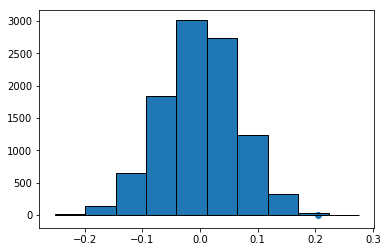

0.0009

In [12]:
plt.hist(ts)
plt.scatter(obs, 0)
plt.show()

np.mean(ts>=obs)

In conclusion, with a p-value of 0.0009, we have sufficient evidence to reject the null hypothesis. In other words, we may conclude that there is enough evidence to say that virginica have longer sepal length.